<a href="https://colab.research.google.com/github/abiakshar/TSF_GRIP-Projects/blob/main/KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Abirami Baskaran

# **Task 3: Prediction Using Unsupervised ML**
**K-Means Clustering Algorithm**

K-Means is a type of partitioning clustering. It divides the data into K non-overlapping subsets or clusters without any cluster internal structure or labels. This means, it's an unsupervised algorithm. 

Objects within a cluster are very similar, and objects across different clusters are very different or dissimilar.


Here we are going to separate Iris plant into 3 species such as setosa, veriscolor and verginica. For that we use clustering algorithm such as k-means to group similar species as mentioned, and assign them to a cluster, based on whether they share similar attributes, such as petal width, petal length, sepal width, and sepal length.
 

In [14]:
from google.colab import files
uploaded=files.upload()

Saving Iris.csv to Iris (1).csv


In [15]:
# Import necessary libraries
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
pd.options.mode.chained_assignment = None
%matplotlib inline

In [16]:
# Read the dataset using pandas dataframe
iris_df=pd.read_csv("Iris.csv")
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [17]:
iris_df.shape

(150, 6)

In [25]:
iris_df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [26]:
# Check for null values
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### **Pre-Processing**

In [27]:
df=iris_df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Normalizing over the standard deviation

Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use StandardScaler() to normalize our dataset.

In [28]:
from sklearn.preprocessing import StandardScaler
X=df.values[:,[0,1,2,3]]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

### **Elbow Method for optimum value of K in kmeans**

Our aim is to cluster the similar species, but how we can find how many groups or clusters is required to separate the same features?

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

Graph the relationship between the number of clusters and Within Cluster Sum of Squares (WCSS).

WCSS is defined as the sum of the squared distance between each member of the cluster and its centroid.


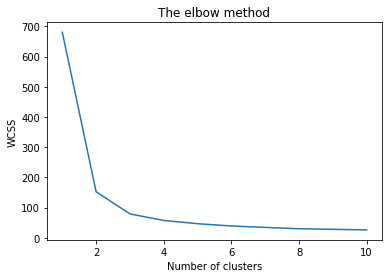

In [29]:
 wcss=[]
 for i in range(1, 11):
    k_means = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    k_means.fit(X)
    wcss.append(k_means.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()



From this graph how we can select the k?
To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the inertia start decreasing in a linear fashion. So at the point 3 the inertia start decreasing. So,we conclude that the **optimal number of clusters for the data is 3**.

### **Setting up K-Means**

KMeans class has many parameters that can be used.

**init**: Initialization method of the centroids.

Value will be: "k-means++". k-means++ selects initial cluster centers for k-means clustering in a smart way to speed up convergence.

**n_clusters**: The number of clusters to form as well as the number of centroids to generate.
Value will be: 3 

**n_init**: Number of times the k-means algorithm will be run with different centroid seeds. 
Value will be: 10

#### Initialize KMeans with the parameters, where the output parameter is called k_means.

Let's apply kmeans on the dataset and take look at the clulster labels

In [30]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 10)
y=k_means.fit_predict(X)
labels = k_means.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


We can assign labels to each row in the dataframe

In [31]:
df["cluster"]=labels
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### **Visualizing the resulting cluster**

KMeans model initialized, let's plot them and see what the clusters look like.

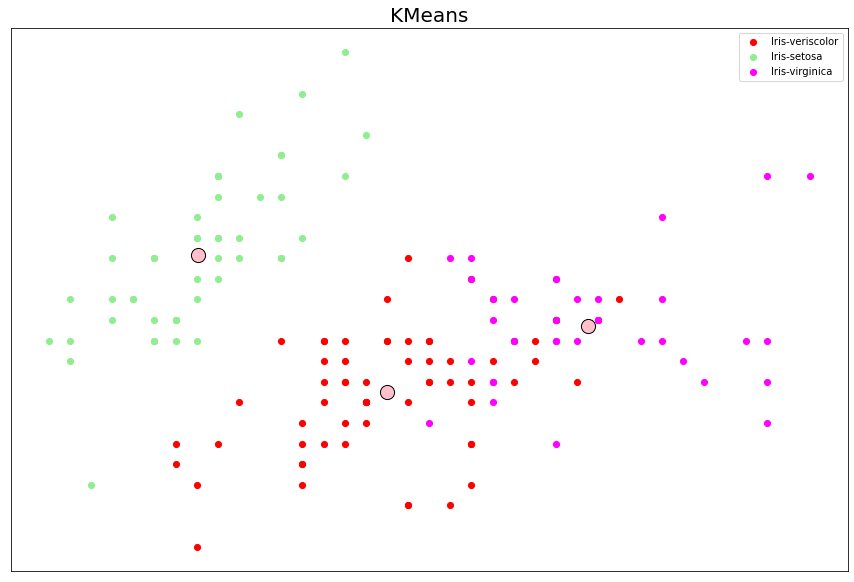

In [33]:
# Initialize the plot with specified dimensions
plt.figure(figsize=(15,10))
# Create a plot
plt.scatter(X[y == 0, 0], X[y == 0,1], s = 150, c = 'red',label='Iris-veriscolor',marker='.')
plt.scatter(X[y == 1, 0], X[y == 1,1], s = 150, c = 'lightgreen',label='Iris-setosa',marker='.')
plt.scatter(X[y == 2, 0], X[y == 2,1],s = 150, c = 'magenta',label='Iris-virginica',marker='.')
#Plot the centroids with specified color, but with a darker outline
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:,1], s = 200, c = 'pink',edgecolors='black')
plt.title('KMeans',fontsize=20)
plt.xticks(())
plt.yticks(())
plt.legend()
plt.show()

Iris-setosa is separable from other two. But Iris-veriscolor and Iris-virginica are not separable from each other, which means there is no intra cluster distance between these two groups.

